In [2]:
# Classifier to predict cardiovascular disease (CVD)
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Open file and confirm path works
df = pd.read_csv('HP.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#1. Preliminary analysis 
#Structure of the data, duplicates, missing values

print(df.shape)
print(df.duplicated().sum(axis=0))
df.reset_index(drop = True, inplace = True)
df.isna().sum(axis=0)

#Observation: 1 duplicate, no missing values

(303, 14)
1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#Drop duplicate rows, confirm duplicates have been dropped and check against change of shape 
df.drop_duplicates(inplace=True)
print(df.duplicated().sum(axis=0))
print(df.shape)

0
(302, 14)


In [5]:
#Rename column titles for clarity

df.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1, inplace = True)

In [6]:
#2. Exploratory Data Analysis
#Preliminary statistical summary of the data, measures of central tendencies and spread of the data
df.info()
df.describe()

#Observation: No obvious categorical variables (need to check for numeric variables that are categorical in nature)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int64  
 2   chest_pain_type          302 non-null    int64  
 3   resting_blood_pressure   302 non-null    int64  
 4   cholesterol              302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int64  
 6   resting_ecg              302 non-null    int64  
 7   max_heart_rate           302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int64  
 9   st_depression            302 non-null    float64
 10  st_slope                 302 non-null    int64  
 11  major_vessels            302 non-null    int64  
 12  thalessimia              302 non-null    int64  
 13  target                   302 non-null    int64  
dtypes: float64(1), int64(13)
m

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Identifying variables that might be categorical in nature
cat = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']
df.loc[ : , ~df.columns.isin(cat)].describe()

,age,resting_blood_pressure,cholesterol,resting_ecg,max_heart_rate,st_depression,major_vessels,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,1.043046,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,1.161452,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.800000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.600000,1.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,6.200000,4.000000,1.000000


In [8]:
#Looking for unique values
desc= pd.DataFrame(index = cat)
desc['nuinque'] = df[cat].apply(lambda x : x.nunique(), axis = 0)
desc['unique'] = 0
for i in cat :
    desc.loc[i,'unique'] = str(list(df[i].value_counts().index))
desc.T

#Observation: Thalessimia should have 3 unique values but has 3, the 0 value is hidden missing data that needs imputing 

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
nuinque,2,4,2,2,3,4
unique,"[1, 0]","[0, 2, 1, 3]","[0, 1]","[0, 1]","[2, 1, 0]","[2, 3, 1, 0]"


In [9]:
#Finding most common thalessimia value
df.thalessimia.value_counts()

2    165
3    117
1     18
0      2
Name: thalessimia, dtype: int64

In [10]:
#Imputing most common thalessimia value of 2 to where it is 0
df.loc[df.thalessimia==0 , 'thalessimia'] = 2

In [11]:
#Converting the numeric categories to relevent descriptors
df.loc[df.sex == 0 , 'sex'] = 'female'
df.loc[df.sex == 1, 'sex'] = 'male'

df.loc[df.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
df.loc[df.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
df.loc[df.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
df.loc[df.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

df.loc[df.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
df.loc[df.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

df.loc[df.resting_ecg == 0, 'resting_ecg']  = 'normal'
df.loc[df.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
df.loc[df.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

df.loc[df.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
df.loc[df.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

df.loc[df.st_slope == 0, 'st_slope'] = 'upsloping'
df.loc[df.st_slope == 1, 'st_slope'] = 'flat'
df.loc[df.st_slope == 2, 'st_slope'] = 'downsloping'

df.loc[df.thalessimia == 1,'thalessimia'] = 'normal'
df.loc[df.thalessimia == 2,'thalessimia'] = 'fixed defect'
df.loc[df.thalessimia == 3,'thalessimia'] = 'reversable defect'

#df.loc[data.target == 0, 'target']= 'Disease -'
#df.loc[data.target == 1, 'target']= 'Disease +'

In [12]:
dsprsnt = df[df.target == 1].copy()
dsabsnt = df[df.target == 0].copy()

In [13]:
#Target Distribution
vc = df.target.value_counts()
vc

1    164
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


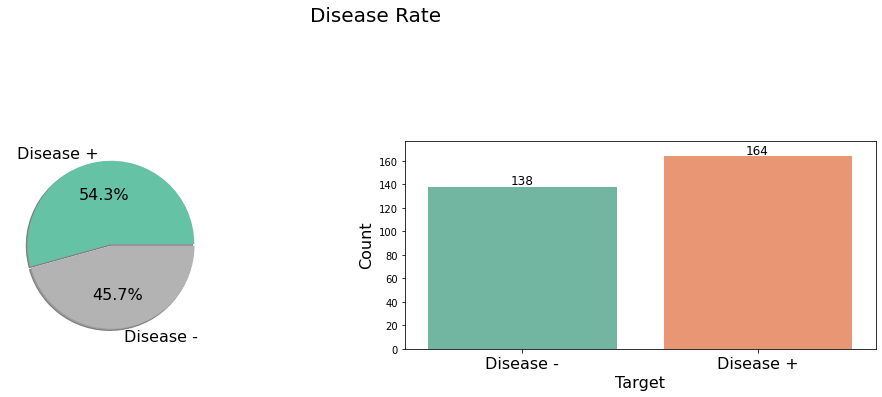

In [14]:
#Checking for bias

f,axes = plt.subplots(1,2, figsize = (15,6))
# plot no. 1
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'DejaVu Sans','color': 'black','size': 16}, labels = ['Disease +','Disease -'])
axes[0].set_ylabel('')

# plot no. 2
sns.countplot(df.target,ax = axes[1],palette= 'Set2')
for i in range(len(vc)):
    axes[1].annotate(vc[i], (i-0.05,vc[i]+2), fontsize = 12)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel('Target',fontsize = 16, family = 'DejaVu Sans')
axes[_layout(pad = 4)
plt.show()1].set_ylabel('Count',fontsize = 16, family = 'DejaVu Sans')
axes[1].set_xticklabels( ['Disease -','Disease +'], fontsize = 16, family = 'DejaVu Sans')
f.suptitle('Disease Rate\n\n', fontsize = 20, family = 'DejaVu Sans')
plt.tight;

#Observation: To understand the data better, it is necessary to understand our target variable. The data collected has almost equal representation of diseased and healthy samples.

<AxesSubplot:xlabel='target', ylabel='age'>

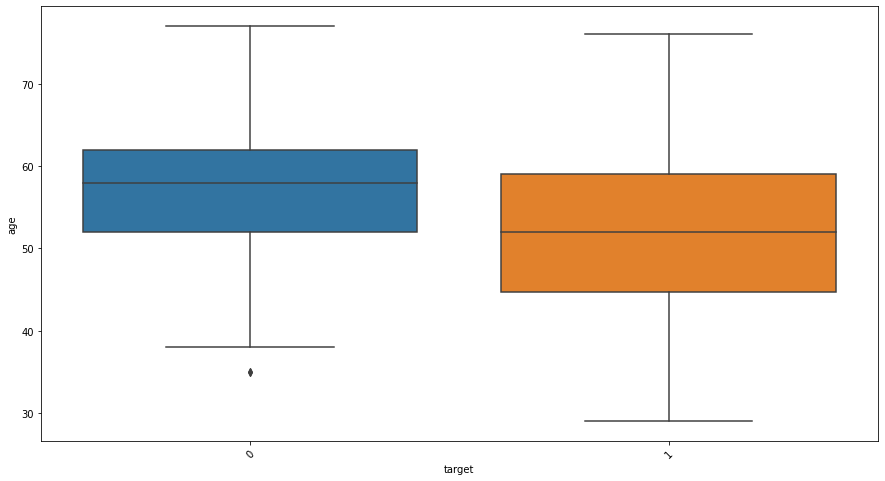

In [15]:
#Occurrence of CVD across the Age category
#Age boxplot

plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot(data=df, x ='target', y='age')

#Observation: Obviously the upper age of those with CVD (1) is lower than those without (0) because CVD can be fatal or shorten life

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


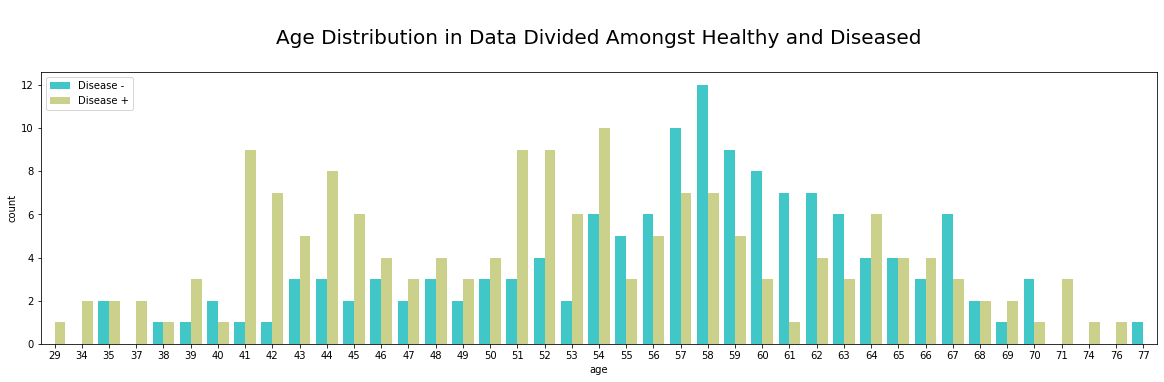

In [16]:
#Age dist plot
plt.figure(figsize = (20,5))
sns.countplot(df.age, hue = df.target, palette='rainbow')
plt.legend(['Disease -','Disease +'], loc = 'upper left')
plt.title('\nAge Distribution in Data Divided Amongst Healthy and Diseased\n', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


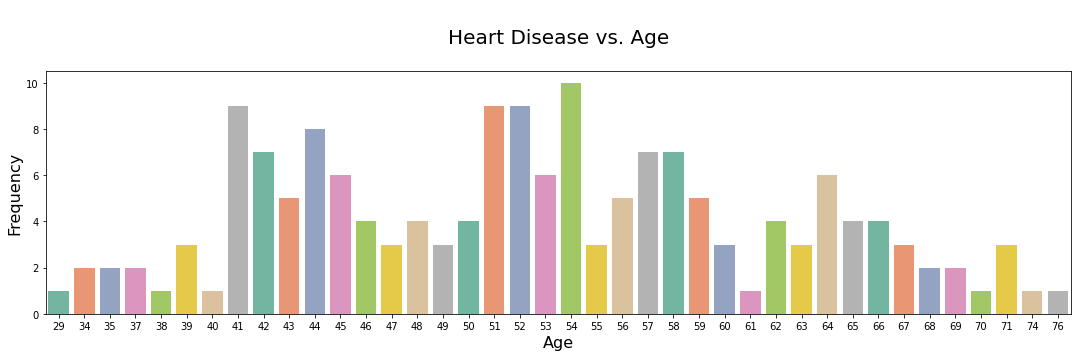

In [17]:
#Age count plot 
plt.figure(figsize = (15,5))
sns.countplot(dsprsnt.age, palette='Set2')
plt.title('\nHeart Disease vs. Age\n',family='DejaVu Sans',fontsize= 20)
plt.tight_layout( )
plt.xlabel('Age',family='DejaVu Sans',fontsize= 16)
plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 16)
plt.show()

#Observation:
#The chances of heart attack across age has intermittent peaks
#Tendency of disease increases after 40
#The age groups 41 to 45 and 51 to 54 have the highest chances of heart attack

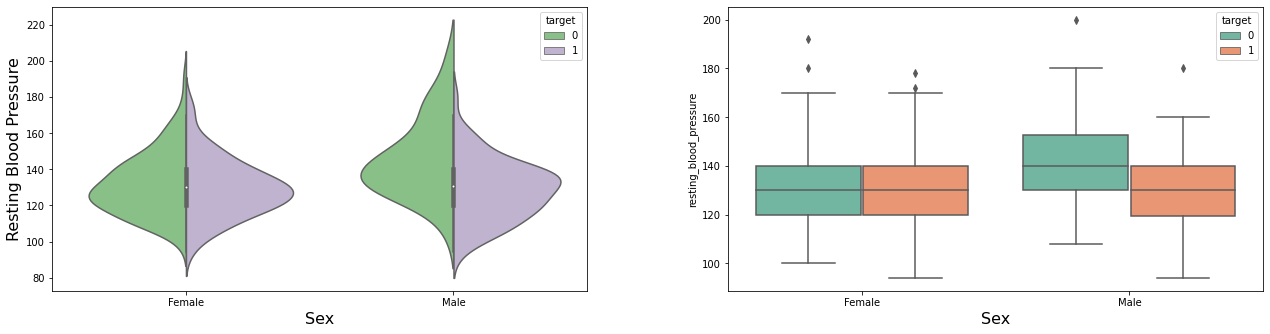

In [18]:
#Resting Blood Pressure of Gender vs. Target

f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'resting_blood_pressure', x = 'sex',hue = 'target',data = df, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Resting Blood Pressure', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = df.sex,  y = df.resting_blood_pressure, hue = df.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

#Observations
#Based on the graph, we can see the target who has cardiovascular diseases have resting blood pressure.
#It shows category wise data of male and female.

In [19]:
# cat_plot
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,5))
    vc = df[var].value_counts() 
    nouniq = df[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'Set3', autopct = '%0.1f%%',
                                        textprops = {'family': 'times','color': 'black','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='DejaVu Sans',fontsize= 20)
    
# count plot
#pd.crosstab(df[var], df.target).plot.bar(cmap = 'Set2', ax = axes[1])
    sns.countplot(x = df[var], hue = df.target, ax = axes[1], palette='Set2')
    plt.xticks( fontsize = 15, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 16, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 16, color = 'black' , family =  'DejaVu Sans')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='DejaVu Sans',fontsize= 20)
    plt.tight_layout(pad = 4 )
    plt.show()

In [20]:
# real_distribution
def real_distribution(var):
    f,axes = plt.subplots(1,2, figsize = (15,5))
    sns.distplot(dsprsnt[var],ax = axes[0], color = 'salmon')
    sns.distplot(dsabsnt[var], ax = axes[0], color = 'green')
    sns.boxplot(y = df[var], x = df.target, ax = axes[1], palette='Set2')
    axes[0].set_xlabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_ylabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xlabel('Target', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xticklabels(['Disease -','Disease +'])
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()),fontsize= 20, family = 'DejaVu Sans')
    plt.tight_layout(w_pad= 12, pad = 4 )
    plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


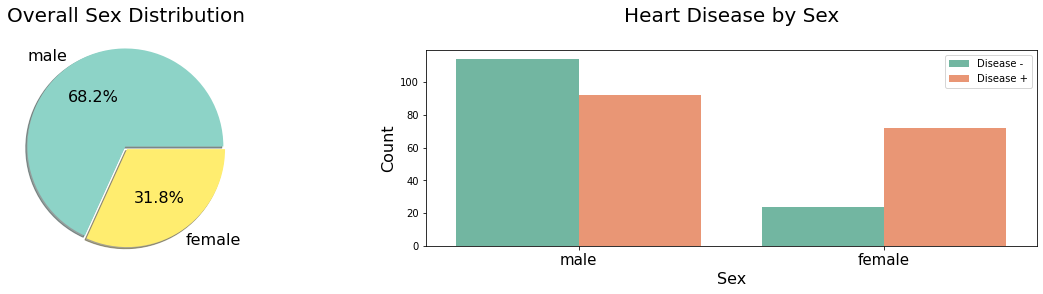

In [21]:
cat_plot('sex')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


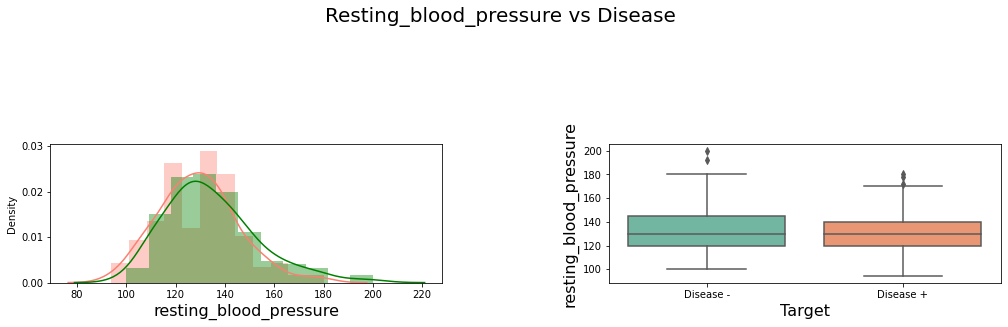

In [22]:
real_distribution('resting_blood_pressure')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


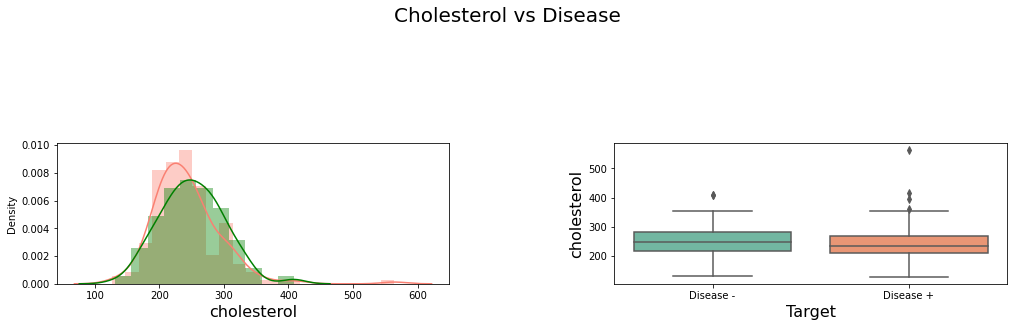

In [23]:
real_distribution('cholesterol')

findfont: Font family ['georgia'] not found. Falling back to DejaVu Sans.


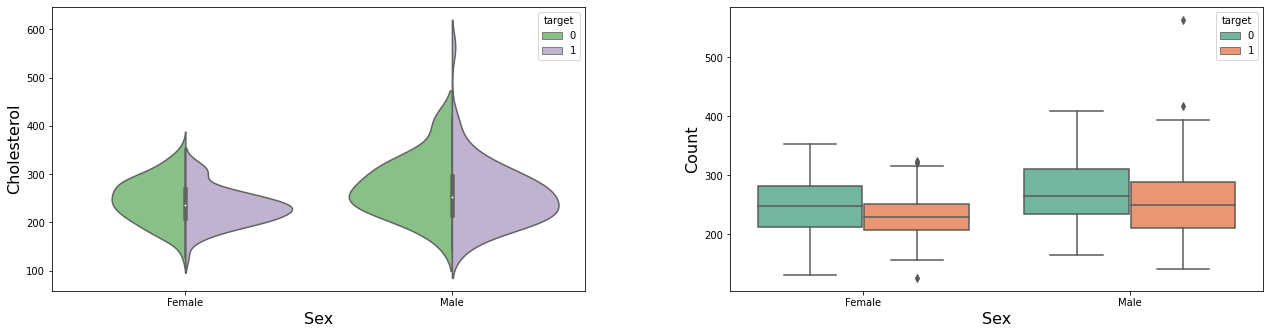

In [24]:
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'cholesterol', x = 'sex',hue = 'target',data = df, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Cholesterol', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = df.sex,  y = df.cholesterol, hue = df.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
axes[1].set_ylabel('Count',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

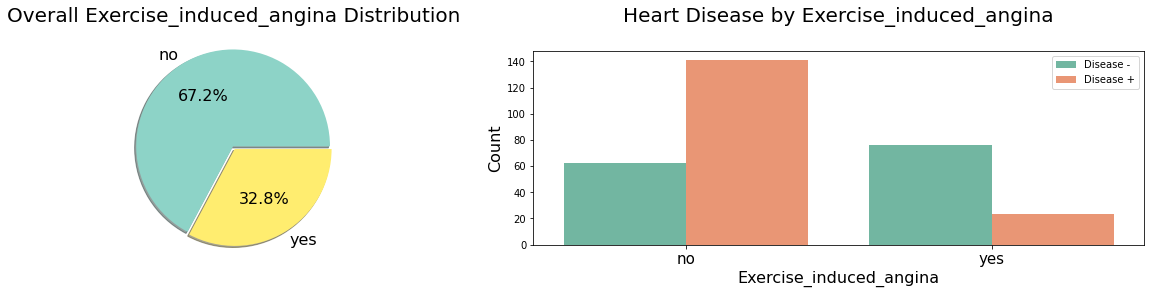

In [25]:
#Relationship between Peak Exercising and Occurrence of Heart Attack
cat_plot('exercise_induced_angina')

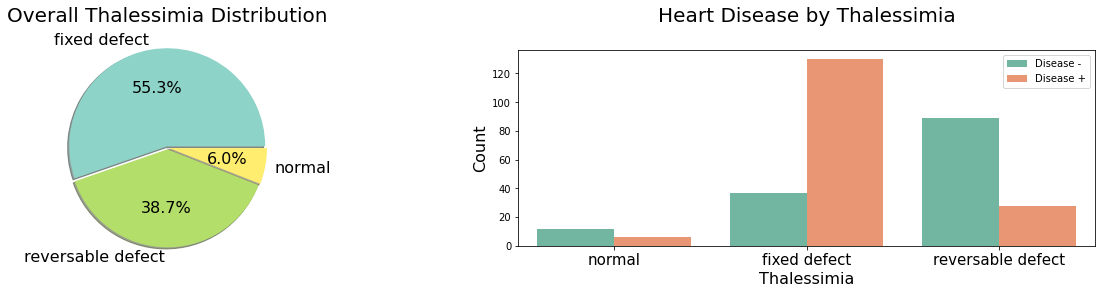

In [26]:
#Thalassemia vs. CVD
cat_plot('thalessimia')

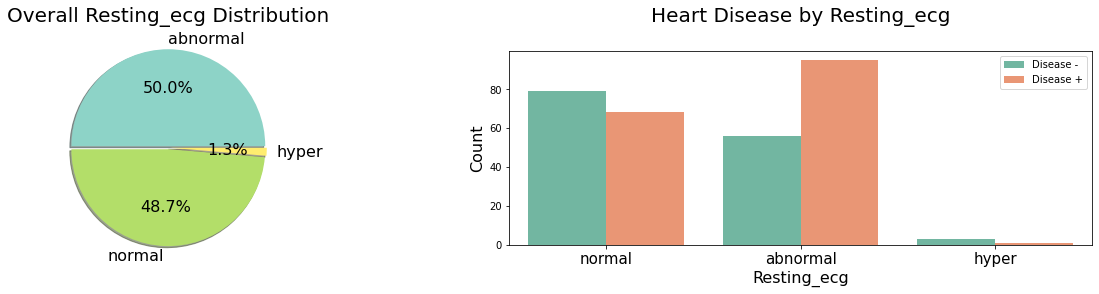

In [27]:
#Factors affecting occurance of CVD
#Resting_ecg

cat_plot('resting_ecg')

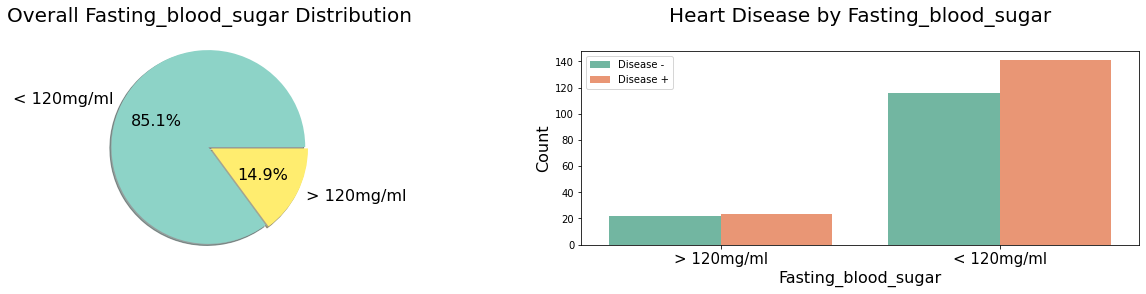

In [28]:
#Factors affecting occurance of CVD
#Fasting blood sugar
cat_plot('fasting_blood_sugar')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


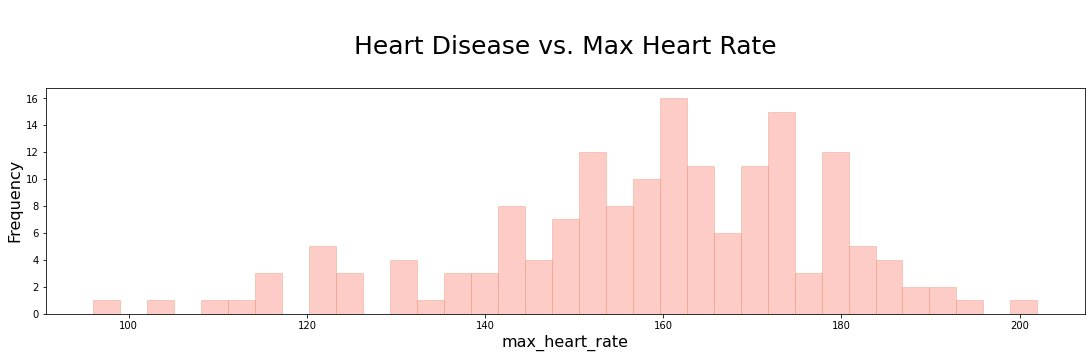

In [29]:
#real_distribution('max_heart_rate')
plt.figure(figsize = (15,5))
sns.distplot(dsprsnt.max_heart_rate, kde = False, bins = 35, hist_kws = {'edgecolor':'darksalmon', 'color' :'salmon'})
plt.title('\nHeart Disease vs. Max Heart Rate\n',family='DejaVu Sans',fontsize= 25)
plt.tight_layout( )
plt.xlabel('max_heart_rate',family='DejaVu Sans',fontsize= 16)
plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 16)
plt.show()

In [30]:
df.columns
#The column names such as age, sex, chest_pain_type, resting_blood_pressure, cholesterol, fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_induced_angina, st_depression, st_slope, major_vessels, thalessimia, and target present in the data dataframe.

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


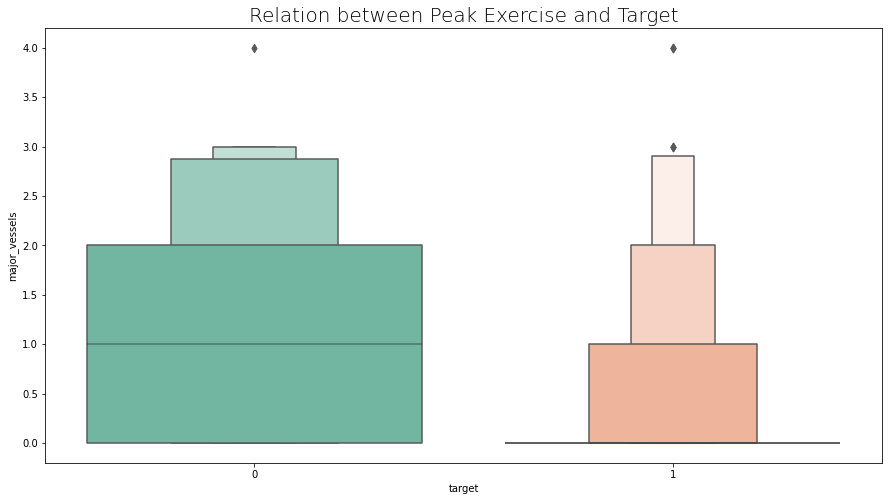

In [31]:
plt.figure(figsize= (15,8))
sns.boxenplot(df['target'], df['major_vessels'], palette = 'Set2')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()
#The above Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

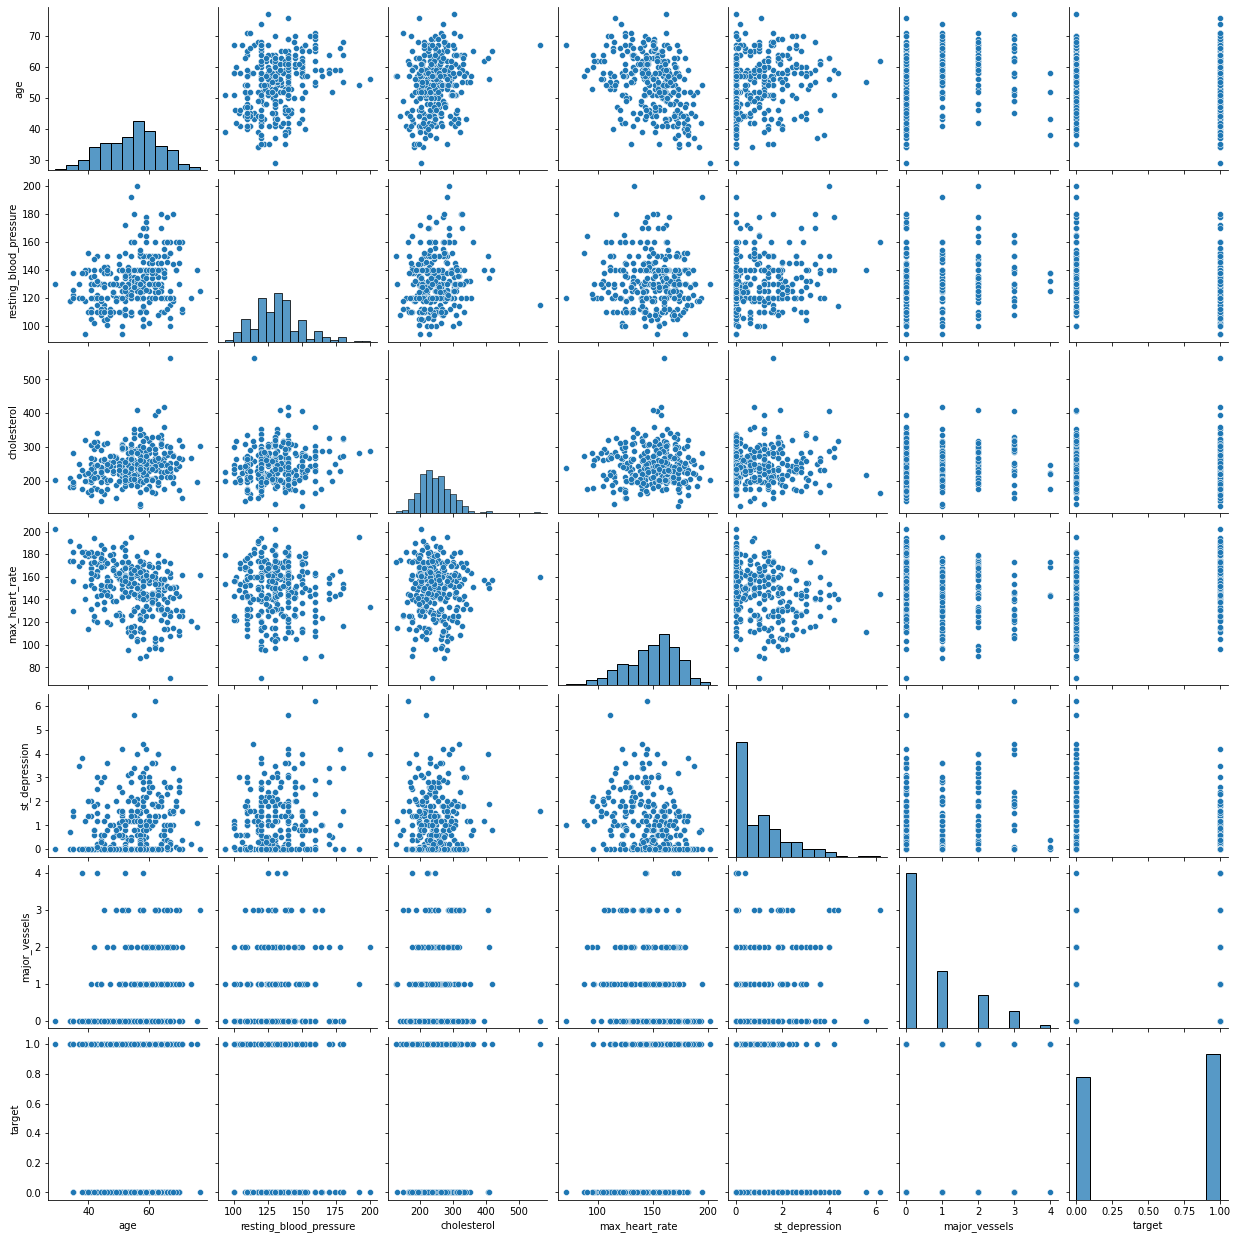

In [32]:
cols = ['age', 'sex', 'chest_pain_type','resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression','st_slope','major_vessels','thalessimia','target']
sns.pairplot(df[cols])


In [33]:
### Building the classifier
# Iteration 1
# Identify significant variables using a correlation matrix
corr = df.corr()
corr

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
age,1.000000,0.283121,0.207216,-0.395235,0.206040,0.302261,-0.221476
resting_blood_pressure,0.283121,1.000000,0.125256,-0.048023,0.194600,0.099248,-0.146269
cholesterol,0.207216,0.125256,1.000000,-0.005308,0.050086,0.086878,-0.081437
max_heart_rate,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,-0.228311,0.419955
st_depression,0.206040,0.194600,0.050086,-0.342201,1.000000,0.236560,-0.429146
major_vessels,0.302261,0.099248,0.086878,-0.228311,0.236560,1.000000,-0.408992
target,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,-0.408992,1.000000


<AxesSubplot:>

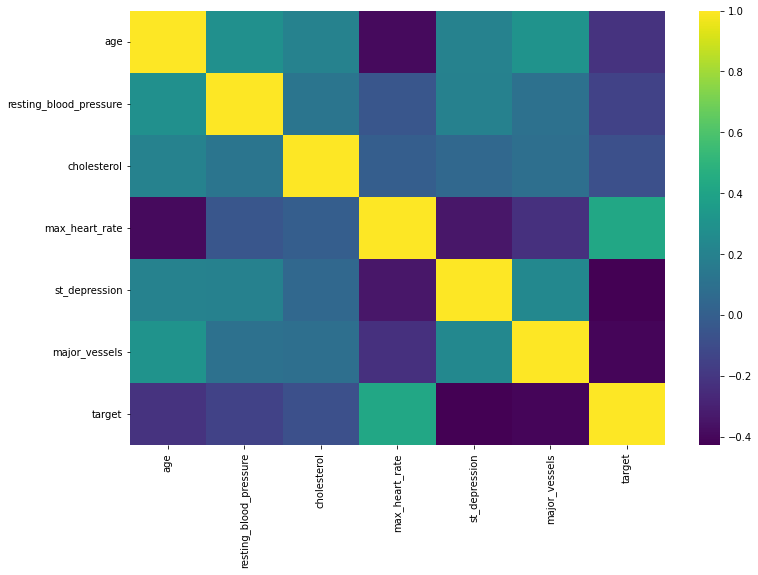

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis')

In [35]:
# Take Target column from correlation matrix, put it into absolute value, and assign it to new variable cor_target
# Take only those values from cor_target that are larger than .3, and assign it to rel_features
# Display rel_features
cor_target = abs(corr["target"])
rel_features=cor_target[cor_target>0.3]
rel_features
# In absolute terms, no features are strongly correlated on their own, resting blood pressure and cholesterol don't even cross the .3 threshold  

max_heart_rate    0.419955
st_depression     0.429146
major_vessels     0.408992
target            1.000000
Name: target, dtype: float64

In [36]:
# Import additional libraries
# Rename train_test_split as split

from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [37]:
# Drop irrelevant columns, and assign relevant columns to data0
data0 = df.drop(['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','resting_ecg','st_slope','thalessimia'], axis=1)

# Split data0 into train and test data
train0, test0 = split(data0, test_size = .30, random_state = 12)
print(train0.shape)

train0.head(2)

(211, 7)


,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
137,62,128,208,140,0.0,0,1
232,55,160,289,145,0.8,1,0


In [38]:
# Remove target column

X_train0 = train0.drop('target', axis = 1)
Y_train0 = train0.target
X_test0 = test0.drop('target', axis = 1)
Y_test0 = test0.target

In [39]:
# Rename logisticRegression() as lr and fit the model

lr = LogisticRegression()
lr.fit(X_train0,Y_train0)

# Given unlabeled observations X, returns the predicted labels Y
pred0 = lr.predict(X_test0)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [40]:
accuracy_score(y_true = Y_test0,y_pred = pred0)

print(classification_report(y_true=Y_test0,y_pred = pred0))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.81      0.83      0.82        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test0, pred0))

[[36  9]
 [ 8 38]]


In [42]:
# Accuracy of confusion matrix
Acc0 = (36+38)/(36+8+9+38)
Acc0

0.8131868131868132

In [43]:
# Random Forest - first iteration
from sklearn.ensemble import RandomForestClassifier
clf0 = RandomForestClassifier(n_estimators=100)
clf0.fit(X_train0, Y_train0)
y_pred_random_forest0 = clf0.predict(X_test0)
acc_random_forest0 = round(clf0.score(X_train0, Y_train0) * 100, 2)
print (acc_random_forest0)

100.0


In [44]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test0, y_pred_random_forest0))

# Observations from the above output:
# The accuracy is 100 and this suggests that there is overfitting and issues with the feature selection.
# To counter this, let us consider standard error and p-value for feature selection.

Accuracy: 0.7692307692307693


In [45]:
# Classification: Second Iteration
# Converting Categorical Variables to Numerical

#Male=1, Female=0
#Converting sex to numerical variable in data
df['sex'] = df['sex'].map( {'male': 1, 'female': 0} ).astype(int)

#Converting resting_ecg to numerical variable in data
df['resting_ecg'] = df['resting_ecg'].map( {'normal': 0, 'abnormal': 1, 'hyper': 2} ).astype(int)

#Converting thalessimia to numerical variable in data
df['thalessimia'] = df['thalessimia'].map( {'normal': 0, 'fixed defect': 1, 'reversable defect': 2} ).astype(int)

#Converting chest_pain_type to numerical variable in data
df['chest_pain_type'] = df['chest_pain_type'].map( {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'typical angina': 3} ).astype(int)

#Converting fasting_blood_sugar to numerical variable in data
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map( {'< 120mg/ml': 0, '> 120mg/ml': 1} ).astype(int)

##Converting st_slope to numerical variable in data
df['st_slope'] = df['st_slope'].map( {'upsloping': 0, 'downsloping': 1, 'flat': 2} ).astype(int)

##Converting exercise_induced_angina to numerical variable in data
df['exercise_induced_angina'] = df['exercise_induced_angina'].map( {'no': 0, 'yes': 1} ).astype(int)

In [46]:
df.head(1)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1


In [47]:
# Using Logistic Regression for Feature Selection
# Replicating dataset

data_LR = df
data_LR.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1


In [48]:
# Splitting the dataset

train_LR, test_LR = split(data_LR, test_size = .30, random_state = 12)
print(train_LR.shape)

train_LR.head(2)

(211, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
137,62,1,1,128,208,1,0,140,0,0.0,1,0,1,1
232,55,1,3,160,289,0,0,145,1,0.8,2,1,2,0


In [49]:
X_train_LR = train_LR.drop('target', axis = 1)
Y_train_LR = train_LR.target
X_test_LR = test_LR.drop('target', axis = 1)
Y_test_LR = test_LR.target

In [50]:
import statsmodels.api as sm
# Apply logistic regression
model_LR = sm.Logit(Y_train_LR, X_train_LR)
model_LR = model_LR.fit()
#Find the summary
model_LR.summary()

# List of variables with less standard error and p-value less than or equal to 0.05:
# sex
# chest_pain_type
# max_heart_rate
# st_depression
# major_vessels
# thalessimia

Optimization terminated successfully.
         Current function value: 0.379944
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:                  0.4462
Time:                        22:07:34   Log-Likelihood:                -80.168
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 8.921e-22
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0228      0.022      1.032      0.302      -0.021       0.066
sex                        -1.5938      0.490     -3.251      0.001      -2.555      -0.633
chest_pain_type            -0.4338      0.221     -1.959      0.050      -0.868       0.000
resting_blood_pressure     -0.0174      0.011     -1.560      0.119      -0.039       0.004
cholesterol                -0.0028      0.005     -0.615      0.539      -0.012       0.006
fasting_blood_sugar         0.6102      0.607      1.005      0.315      -0.580       1.800
resting_ecg                 0.7108      0.391      1.820      0.069      -0.055       1.476
max_heart_rate              0.0411      0.010      4.180      0.000       0.022       0.060
exercise_induced_angina    -0.5806      0.485     -1.196      0.232      -1.532       0.371
st_depression              -0.7242      0.240     -3.019      0.003      -1.194      -0.254
st_slope                    0.1797      0.365      0.492      0.623      -0.536       0.896
major_vessels              -0.8405      0.236     -3.557      0.000      -1.304      -0.377
thalessimia                -1.1985      0.347     -3.459      0.001      -1.878      -0.519
===========================================================================================
"""

In [51]:
# Dropping variables
data_LR.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1


In [52]:
#dropping variables
data_Log = data_LR.drop(['age','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','exercise_induced_angina','st_slope'], axis=1)

In [53]:
#Dividing the dataset
train_Log, test_Log = split(data_Log, test_size = .30, random_state = 12)

In [54]:
print(train_Log.shape)

train_Log.head(2)

(211, 7)


,sex,chest_pain_type,max_heart_rate,st_depression,major_vessels,thalessimia,target
137,1,1,140,0.0,0,1,1
232,1,3,145,0.8,1,2,0


In [55]:
print(test_Log.shape)

test_Log.head(2)

(91, 7)


,sex,chest_pain_type,max_heart_rate,st_depression,major_vessels,thalessimia,target
228,1,0,159,0.2,0,2,0
136,0,2,96,0.0,0,1,1


In [56]:

X_train_Log = train_Log.drop('target', axis = 1)
Y_train_Log = train_Log.target
X_test_Log = test_Log.drop('target', axis = 1)
Y_test_Log = test_Log.target

In [57]:
#Logistic Regression Using Statsmodels
#import statsmodels.api as sm
#Apply logistic regression
model_Log = sm.Logit(Y_train_Log, X_train_Log)
model_Log = model_Log.fit()
#Find the summary
model_Log.summary()

Optimization terminated successfully.
         Current function value: 0.400084
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:                  0.4169
Time:                        22:07:35   Log-Likelihood:                -84.418
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 2.227e-24
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                -1.4688      0.447     -3.284      0.001      -2.346      -0.592
chest_pain_type    -0.4832      0.200     -2.418      0.016      -0.875      -0.092
max_heart_rate      0.0333      0.005      7.022      0.000       0.024       0.043
st_depression      -0.7740      0.205     -3.778      0.000      -1.175      -0.372
major_vessels      -0.8070      0.218     -3.704      0.000      -1.234      -0.380
thalessimia        -1.1471      0.316     -3.631      0.000      -1.766      -0.528
===================================================================================
"""

In [58]:
#Prediction
pred_Log = model_Log.predict(X_test_Log)
model_Log.predict(X_train_Log)

137    0.826704
232    0.140540
68     0.928333
142    0.974590
149    0.804113
         ...   
260    0.345733
130    0.924623
242    0.156410
254    0.824364
155    0.785966
Length: 211, dtype: float64

In [59]:
#Confusion matrix
(model_Log.predict(X_train_Log) >= 0.5).astype(int)
model_Log.pred_table()

array([[ 72.,  21.],
       [ 13., 105.]])

In [60]:
#Accuracy
print((72+105)/(72+21+13+105))

0.8388625592417062


In [61]:
#Random forest second iteration
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100)
clf_RF.fit(X_train_Log, Y_train_Log)
y_pred_random_forest_RF = clf_RF.predict(X_test_Log)
acc_random_forest_RF = round(clf_RF.score(X_train_Log, Y_train_Log) * 100, 2)
print (acc_random_forest_RF)

100.0


In [62]:
#Classification: Third Iteration
#Note: We have identified significant variables and now we will use logistic regression from sklearn to train and predict the desired outcome.
lr_slog = LogisticRegression()
lr_slog.fit(X_train_Log,Y_train_Log)

pred_slog = lr_slog.predict(X_test_Log)

In [63]:
#Y_test_Log
pred_slog

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1])

In [64]:
accuracy_score(y_true = Y_test_Log,y_pred = pred_slog)

print(classification_report(y_true=Y_test_Log,y_pred = pred_slog))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.82      0.80      0.81        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test_Log, pred_slog))

[[37  8]
 [ 9 37]]


In [66]:
#Accuracy of confusion matrix
Acc_slog = (37+37)/(37+9+8+37)
Acc_slog

0.8131868131868132

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf0 = RandomForestClassifier(n_estimators=100)
clf0.fit(X_train_Log, Y_train_Log)
y_pred_random_forest_Log = clf0.predict(X_test_Log)
acc_random_forest_Log = round(clf0.score(X_train_Log, Y_train_Log) * 100, 2)
print (acc_random_forest_Log)

100.0


In [68]:
#Predict
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test_Log, y_pred_random_forest_Log))

Accuracy: 0.7582417582417582
